In [1]:
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np

In [2]:
tour=pd.read_csv('tour_package (1).csv')
tour.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [3]:
dd='''CustomerID: Unique customer ID
ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
Age: Age of customer
TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
Occupation: Occupation of customer
Gender: Gender of customer
NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
PreferredPropertyStar: Preferred hotel property rating by customer
MaritalStatus: Marital status of customer
NumberOfTrips: Average number of trips in a year by customer
Passport: The customer has a passport or not (0: No, 1: Yes)
OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
Designation: Designation of the customer in the current organization
MonthlyIncome: Gross monthly income of the customer
'''

In [4]:
tour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [5]:
tour.nunique()

CustomerID                  4888
ProdTaken                      2
Age                           44
TypeofContact                  2
CityTier                       3
DurationOfPitch               34
Occupation                     4
Gender                         3
NumberOfPersonVisiting         5
NumberOfFollowups              6
ProductPitched                 5
PreferredPropertyStar          3
MaritalStatus                  4
NumberOfTrips                 12
Passport                       2
PitchSatisfactionScore         5
OwnCar                         2
NumberOfChildrenVisiting       4
Designation                    5
MonthlyIncome               2475
dtype: int64

In [6]:
tour_dt=tour.drop(['CustomerID','Occupation'],axis=1)

In [7]:
tour_dt.describe().T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,4888.0,0.188216,0.390925,0.0,0.0,0.0,0.0,1.0
Age,4662.0,37.622265,9.316387,18.0,31.0,36.0,44.0,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.0,1.0,3.0,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.0,13.0,20.0,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.0,3.0,3.0,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.0,4.0,4.0,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.0,3.0,4.0,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.0,3.0,4.0,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.0,0.0,1.0,1.0
PitchSatisfactionScore,4888.0,3.078151,1.365792,1.0,2.0,3.0,4.0,5.0


In [8]:
tour_dt.groupby('Gender').describe()

ProdTaken                                                  Age  \
            count      mean       std  min  25%  50%  75%  max   count   
Gender                                                                   
Fe Male     155.0  0.161290  0.368991  0.0  0.0  0.0  0.0  1.0   155.0   
Female     1817.0  0.174463  0.379612  0.0  0.0  0.0  0.0  1.0  1735.0   
Male       2916.0  0.198217  0.398725  0.0  0.0  0.0  0.0  1.0  2772.0   

                    ... NumberOfChildrenVisiting      MonthlyIncome  \
              mean  ...                      75%  max         count   
Gender              ...                                               
Fe Male  38.406452  ...                      2.0  3.0         155.0   
Female   38.035159  ...                      2.0  3.0        1719.0   
Male     37.319986  ...                      2.0  3.0        2781.0   

                                                                        \
                 mean          std      min      25%      50%      75%   
Gender                                                                   
Fe Male  25579.116129  1517.255498  23537.0  24208.0  25331.0  26766.5   
Female   23692.266434  5884.217075   1000.0  20234.5  21988.0  25590.5   
Male     23465.893204  5167.472615  16009.0  20279.0  22130.0  25460.0   

                  
             max  
Gender            
Fe Male  28659.0  
Female   98678.0  
Male     38677.0  

[3 rows x 104 columns]

In [9]:
pd.isnull(tour_dt).sum()

ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [10]:
tour_dt.apply(lambda col: col.unique(),axis=0)

ProdTaken                                                              [1, 0]
Age                         [41.0, 49.0, 37.0, 33.0, nan, 32.0, 59.0, 30.0...
TypeofContact                            [Self Enquiry, Company Invited, nan]
CityTier                                                            [3, 1, 2]
DurationOfPitch             [6.0, 14.0, 8.0, 9.0, 30.0, 29.0, 33.0, 22.0, ...
Gender                                                [Female, Male, Fe Male]
NumberOfPersonVisiting                                        [3, 2, 1, 4, 5]
NumberOfFollowups                         [3.0, 4.0, 2.0, 5.0, nan, 1.0, 6.0]
ProductPitched                  [Deluxe, Basic, Standard, Super Deluxe, King]
PreferredPropertyStar                                    [3.0, 4.0, 5.0, nan]
MaritalStatus                          [Single, Divorced, Married, Unmarried]
NumberOfTrips               [1.0, 2.0, 7.0, 5.0, 6.0, 3.0, 4.0, 19.0, 21.0...
Passport                                                        

In [11]:
cols=['TypeofContact','CityTier','Gender','NumberOfPersonVisiting','NumberOfFollowups','ProductPitched','PreferredPropertyStar','MaritalStatus','NumberOfTrips','Passport','PitchSatisfactionScore','OwnCar','NumberOfChildrenVisiting','Designation']

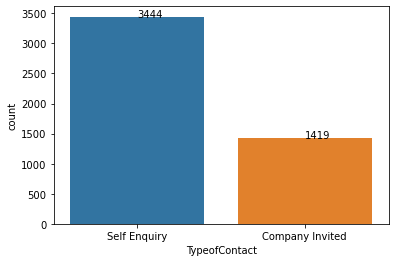

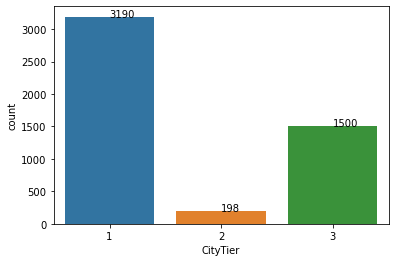

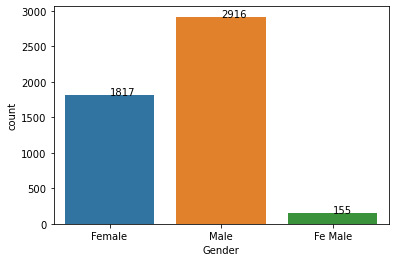

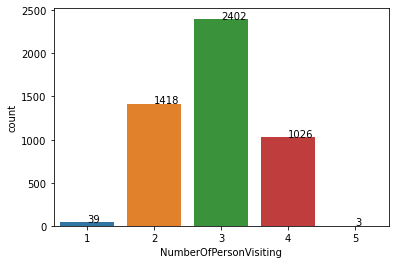

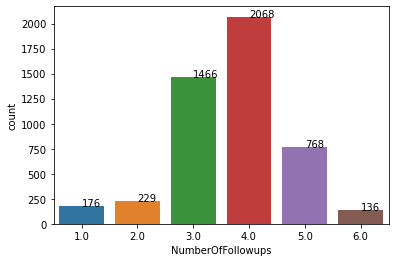

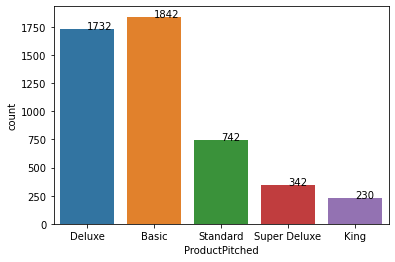

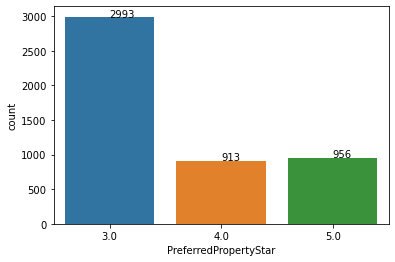

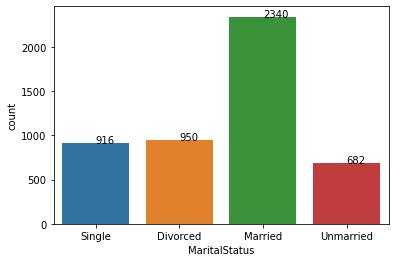

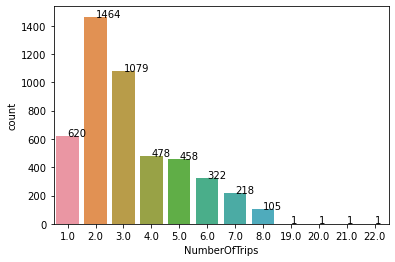

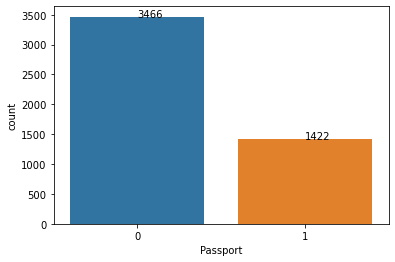

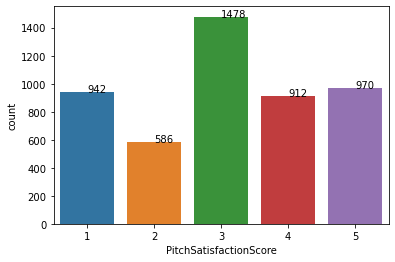

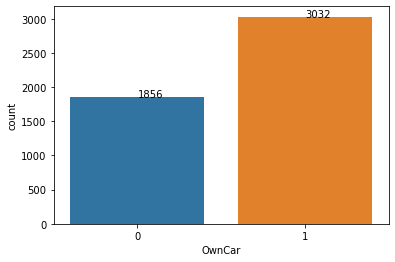

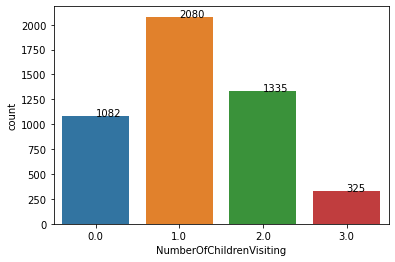

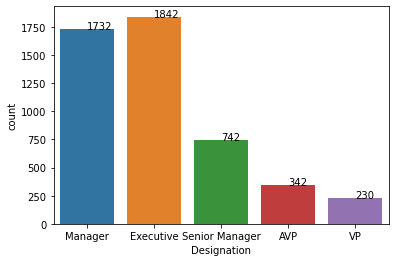

In [12]:
for i in cols:
    f=sns.countplot(x=i,data = tour_dt)
    for i in f.patches:
        x= i.get_x()+i.get_width()/2
        y= i.get_y()+i.get_height()
        plt.annotate(i.get_height(),(x,y))
    plt.show()

In [13]:
for i in ['Age','DurationOfPitch','NumberOfTrips','MonthlyIncome']:
    mean=tour_dt[i].mean()
    tour_dt[i].fillna(value=mean, inplace=True)
tour_dt

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.000000,Self Enquiry,3,6.0,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.000000,Company Invited,1,14.0,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.000000,Self Enquiry,1,8.0,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.000000,Company Invited,1,9.0,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,37.622265,Self Enquiry,1,8.0,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,1,49.000000,Self Enquiry,3,9.0,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,1,28.000000,Company Invited,1,31.0,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,1,52.000000,Self Enquiry,3,17.0,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,1,19.000000,Self Enquiry,3,16.0,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


In [14]:
col=['TypeofContact','Gender','ProductPitched','MaritalStatus','Designation']
for i in col:
    tour_dt=pd.concat([tour_dt,tour_dt[i].str.get_dummies()],axis=1)
    tour_dt=tour_dt.drop(i,axis=1)
tour_dt.head()

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,...,Super Deluxe,Divorced,Married,Single,Unmarried,AVP,Executive,Manager,Senior Manager,VP
0,1,41.000000,3,6.0,3,3.0,3.0,1.0,1,2,...,0,0,0,1,0,0,0,1,0,0
1,0,49.000000,1,14.0,3,4.0,4.0,2.0,0,3,...,0,1,0,0,0,0,0,1,0,0
2,1,37.000000,1,8.0,3,4.0,3.0,7.0,1,3,...,0,0,0,1,0,0,1,0,0,0
3,0,33.000000,1,9.0,2,3.0,3.0,2.0,1,5,...,0,1,0,0,0,0,1,0,0,0
4,0,37.622265,1,8.0,2,3.0,4.0,1.0,0,5,...,0,1,0,0,0,0,1,0,0,0


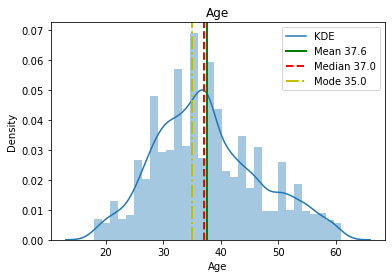

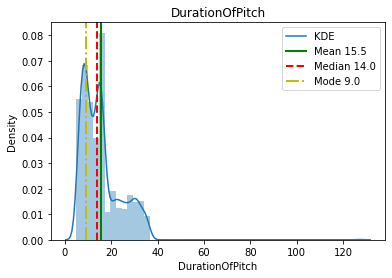

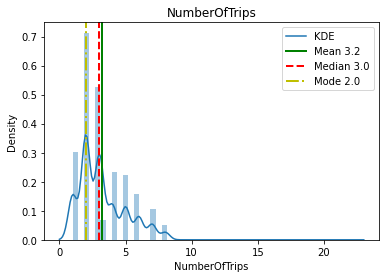

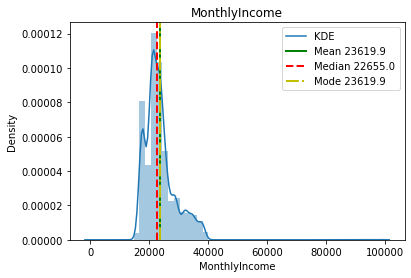

In [15]:
for i in ['Age','DurationOfPitch','NumberOfTrips','MonthlyIncome']:
    mean = tour_dt[i].mean()
    median = tour_dt[i].median()
    mode = tour_dt[i].mode().values[0]
    sns.distplot(tour_dt[i])
    plt.axvline(mean,color='g',ls='-',lw=2)
    plt.axvline(median,color='r',ls='--',lw=2)
    plt.axvline(mode,color='y',ls='-.',lw=2)
    plt.legend({'KDE':'','Mean %.1f'%mean:mean,'Median %.1f'%median:median,'Mode %.1f'%mode:mode})
    plt.title(i)
    plt.show()

In [16]:
tour_dtt=tour_dt.dropna()
tour_dtt.head()

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,...,Super Deluxe,Divorced,Married,Single,Unmarried,AVP,Executive,Manager,Senior Manager,VP
0,1,41.000000,3,6.0,3,3.0,3.0,1.0,1,2,...,0,0,0,1,0,0,0,1,0,0
1,0,49.000000,1,14.0,3,4.0,4.0,2.0,0,3,...,0,1,0,0,0,0,0,1,0,0
2,1,37.000000,1,8.0,3,4.0,3.0,7.0,1,3,...,0,0,0,1,0,0,1,0,0,0
3,0,33.000000,1,9.0,2,3.0,3.0,2.0,1,5,...,0,1,0,0,0,0,1,0,0,0
4,0,37.622265,1,8.0,2,3.0,4.0,1.0,0,5,...,0,1,0,0,0,0,1,0,0,0


In [17]:
tour_dtt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4751 entries, 0 to 4887
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ProdTaken                 4751 non-null   int64  
 1   Age                       4751 non-null   float64
 2   CityTier                  4751 non-null   int64  
 3   DurationOfPitch           4751 non-null   float64
 4   NumberOfPersonVisiting    4751 non-null   int64  
 5   NumberOfFollowups         4751 non-null   float64
 6   PreferredPropertyStar     4751 non-null   float64
 7   NumberOfTrips             4751 non-null   float64
 8   Passport                  4751 non-null   int64  
 9   PitchSatisfactionScore    4751 non-null   int64  
 10  OwnCar                    4751 non-null   int64  
 11  NumberOfChildrenVisiting  4751 non-null   float64
 12  MonthlyIncome             4751 non-null   float64
 13  Company Invited           4751 non-null   int64  
 14  Self Enq

In [18]:
tour_dtt.describe().T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,4751.0,0.189223,0.391727,0.0,0.0,0.0,0.0,1.0
Age,4751.0,37.418992,9.002332,18.0,31.0,37.0,43.0,61.0
CityTier,4751.0,1.652073,0.916501,1.0,1.0,1.0,3.0,3.0
DurationOfPitch,4751.0,15.516354,8.303680,5.0,9.0,14.0,19.0,127.0
NumberOfPersonVisiting,4751.0,2.903599,0.724293,1.0,2.0,3.0,3.0,5.0
NumberOfFollowups,4751.0,3.700695,1.001724,1.0,3.0,4.0,4.0,6.0
PreferredPropertyStar,4751.0,3.577773,0.797234,3.0,3.0,3.0,4.0,5.0
NumberOfTrips,4751.0,3.223345,1.819939,1.0,2.0,3.0,4.0,22.0
Passport,4751.0,0.292149,0.454798,0.0,0.0,0.0,1.0,1.0
PitchSatisfactionScore,4751.0,3.069670,1.365742,1.0,2.0,3.0,4.0,5.0


<AxesSubplot:xlabel='OwnCar', ylabel='count'>

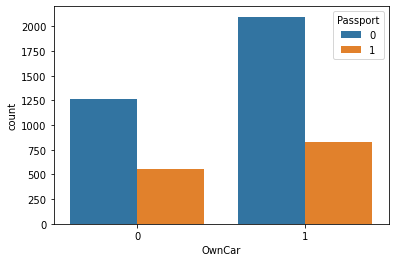

In [19]:
sns.countplot(x='OwnCar',data=tour_dtt,hue= "Passport")

<AxesSubplot:xlabel='ProdTaken', ylabel='count'>

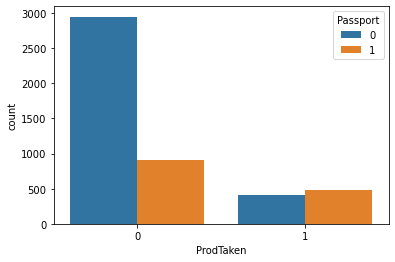

In [20]:
sns.countplot(x='ProdTaken',data=tour_dtt,hue= "Passport")

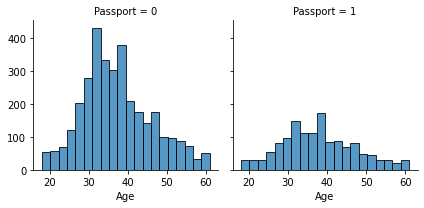

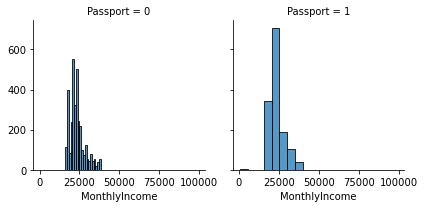

In [21]:
for i in ['Age','MonthlyIncome']:
    fg=sns.FacetGrid(data=tour_dtt,col="Passport")
    fg.map(sns.histplot,i,bins=20)
    plt.show()

<AxesSubplot:ylabel='Age'>

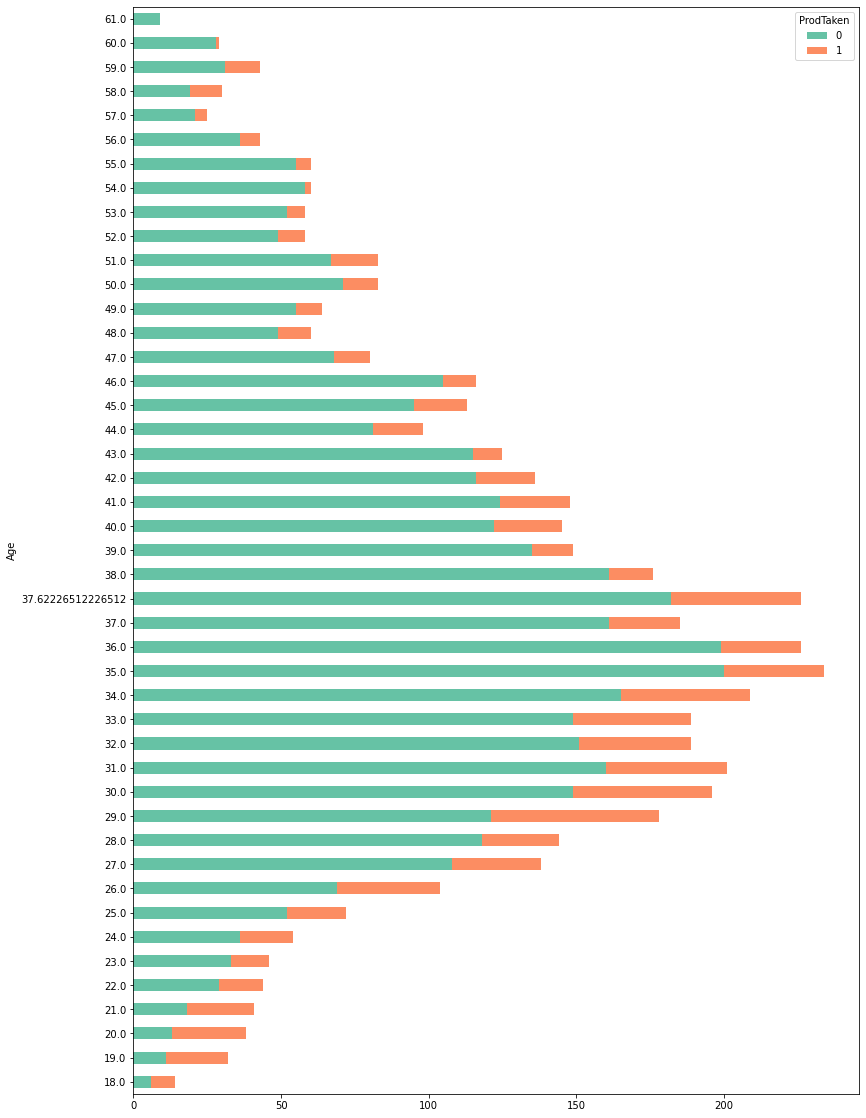

In [39]:
sns.set_palette('Set2')
pd.crosstab(index=tour_dtt['Age'],columns = tour_dtt['ProdTaken']).plot(kind='barh',figsize=(13,20),stacked=True)


<AxesSubplot:>

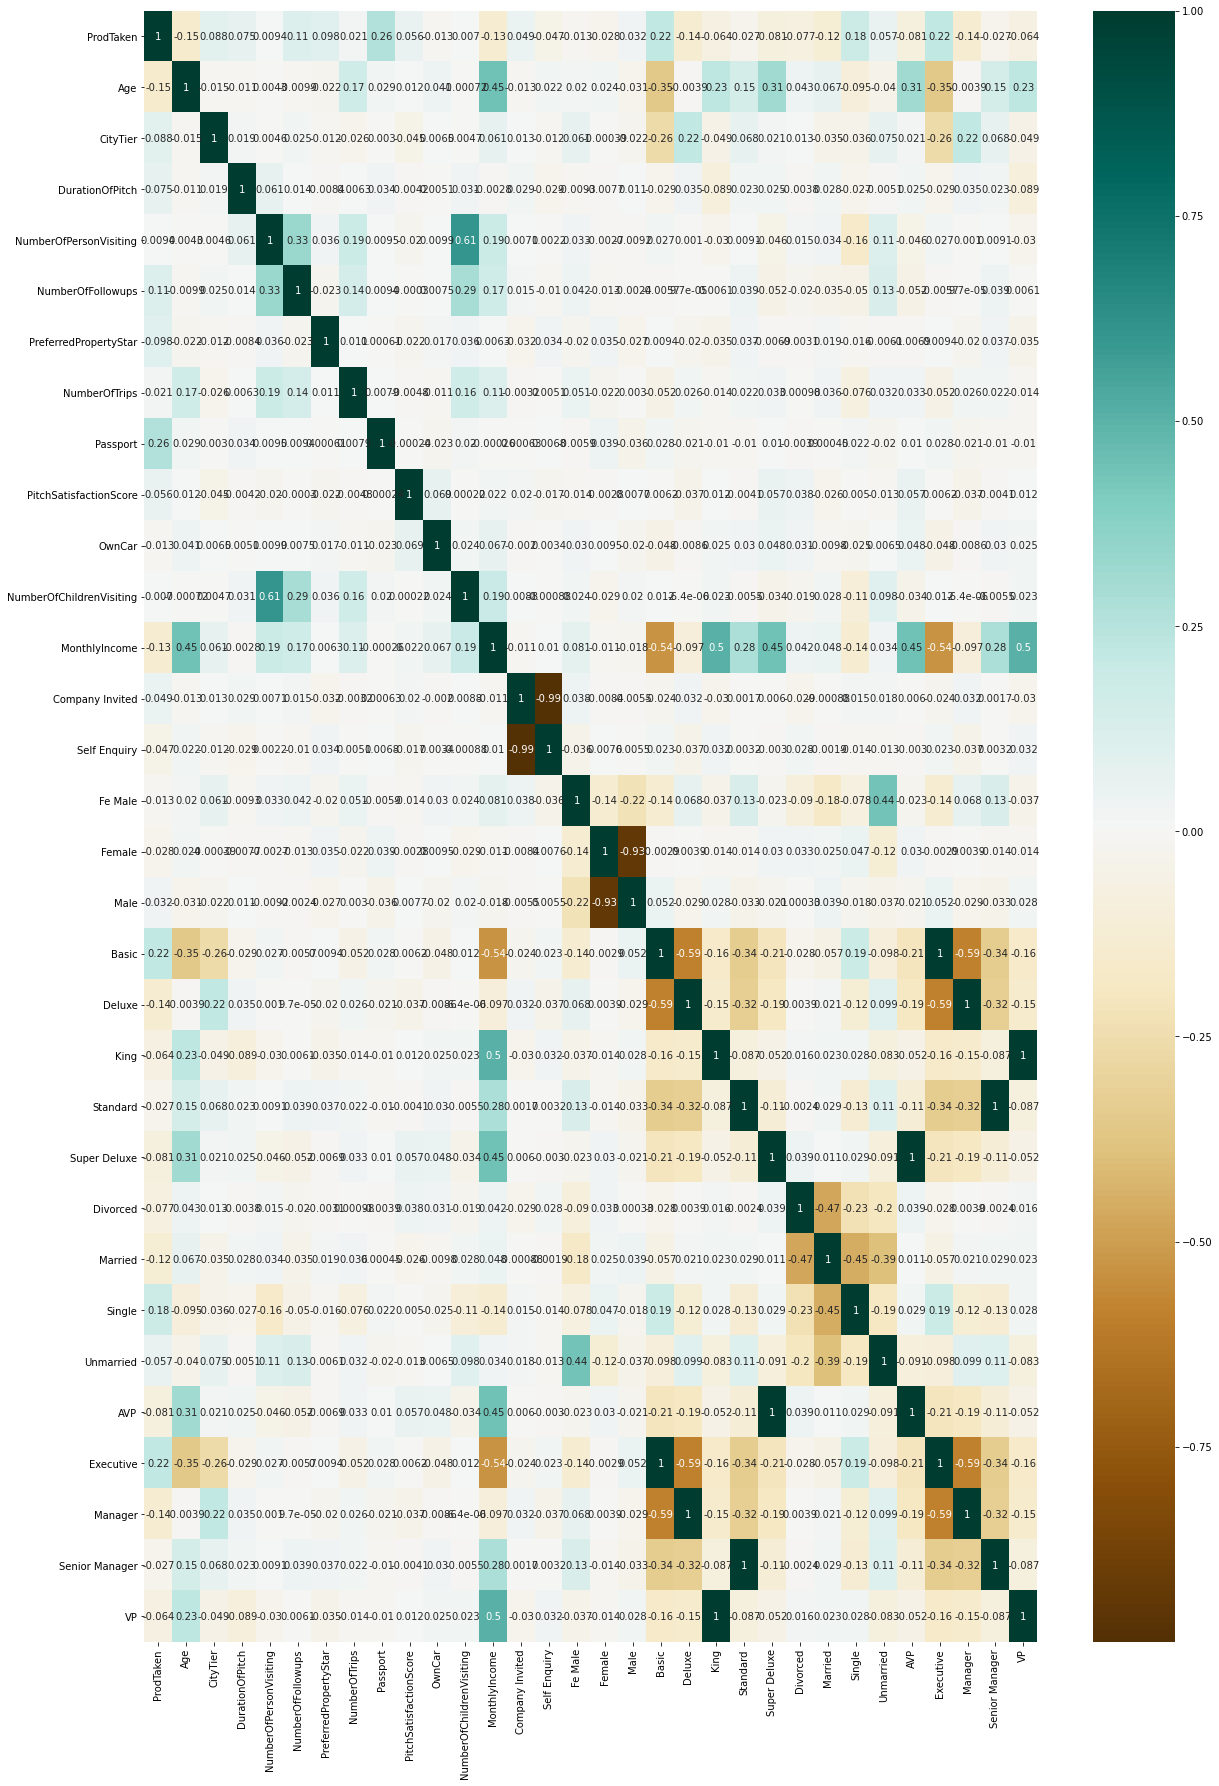

In [23]:
plt.figure(figsize=(20,30))
sns.heatmap(tour_dtt.corr(),annot=True,cmap='BrBG')

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
tour_dtt.columns

Index(['ProdTaken', 'Age', 'CityTier', 'DurationOfPitch',
       'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'MonthlyIncome', 'Company Invited',
       'Self Enquiry', 'Fe Male', 'Female', 'Male', 'Basic', 'Deluxe', 'King',
       'Standard', 'Super Deluxe', 'Divorced', 'Married', 'Single',
       'Unmarried', 'AVP', 'Executive', 'Manager', 'Senior Manager', 'VP'],
      dtype='object')

In [26]:
x=tour_dtt[['MonthlyIncome', 'Age', 'CityTier', 'DurationOfPitch',
       'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting','Company Invited',
       'Self Enquiry', 'Fe Male', 'Female', 'Male', 'Basic', 'Deluxe', 'King',
       'Standard', 'Super Deluxe', 'Divorced', 'Married', 'Single',
       'Unmarried', 'AVP', 'Executive', 'Manager', 'Senior Manager', 'VP']]
y=tour_dtt['ProdTaken']

In [27]:
x.sample(3)

,MonthlyIncome,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,...,Super Deluxe,Divorced,Married,Single,Unmarried,AVP,Executive,Manager,Senior Manager,VP
1256,17468.0,38.000000,1,8.0,3,4.0,4.0,5.0,0,3,...,0,0,1,0,0,0,1,0,0,0
496,18447.0,37.622265,3,28.0,2,3.0,3.0,2.0,0,2,...,0,0,0,1,0,0,1,0,0,0
1777,27061.0,38.000000,1,31.0,2,4.0,4.0,4.0,0,3,...,0,0,1,0,0,0,0,0,1,0


In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [29]:
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, classification_report

In [30]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25, random_state=11)

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
model=LinearRegression().fit(xtrain,ytrain)

In [33]:
print('%.1f%%'%(model.score(xtest,ytest)*100))

21.3%


In [34]:
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV

In [35]:
model=LogisticRegression().fit(xtrain,ytrain)

In [36]:
round(model.score(xtest,ytest)*100,2)

85.27

In [37]:
def create_models(x,y):
    xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25, random_state=11)
    model_dt = DecisionTreeClassifier().fit(xtrain,ytrain)
    model_dt = DecisionTreeClassifier().fit(xtrain,ytrain)
    model_rf = RandomForestClassifier().fit(xtrain,ytrain)
    print('Decision Tree')
    print('-'*20)
    print('Training Score:',model_dt.score(xtrain,ytrain))
    print('Testing Score:',model_dt.score(xtest,ytest)*100)
    
    ypred_dt = model_dt.predict(xtest)
    cnf = pd.DataFrame(confusion_matrix(ytest,ypred_dt),index=['No','Yes'],columns=['No','Yes'])
    sns.heatmap(cnf, annot=True,fmt='d',cbar=None,cmap='YlGn')
    plt.show()
    
    print()
    print('Random Forest')
    print('-'*20)
    print('Training Score:',model_rf.score(xtrain,ytrain))
    print('Testing Score:',model_rf.score(xtest,ytest)*100)
    
    ypred_rf = model_rf.predict(xtest)
    cnf = pd.DataFrame(confusion_matrix(ytest,ypred_rf),index=['No','Yes'],columns=['No','Yes'])
    sns.heatmap(cnf, annot=True,fmt='d',cbar=None,cmap='YlGn')
    
    return model_dt,model_rf

Decision Tree
--------------------
Training Score: 1.0
Testing Score: 90.57239057239057


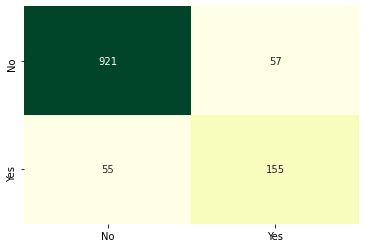


Random Forest
--------------------
Training Score: 1.0
Testing Score: 91.83501683501683


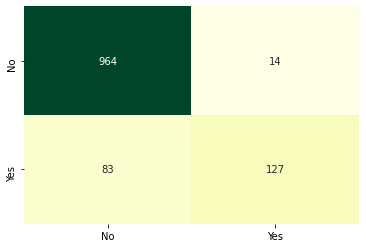

In [38]:
model_dt, model_rf = create_models(x,y)

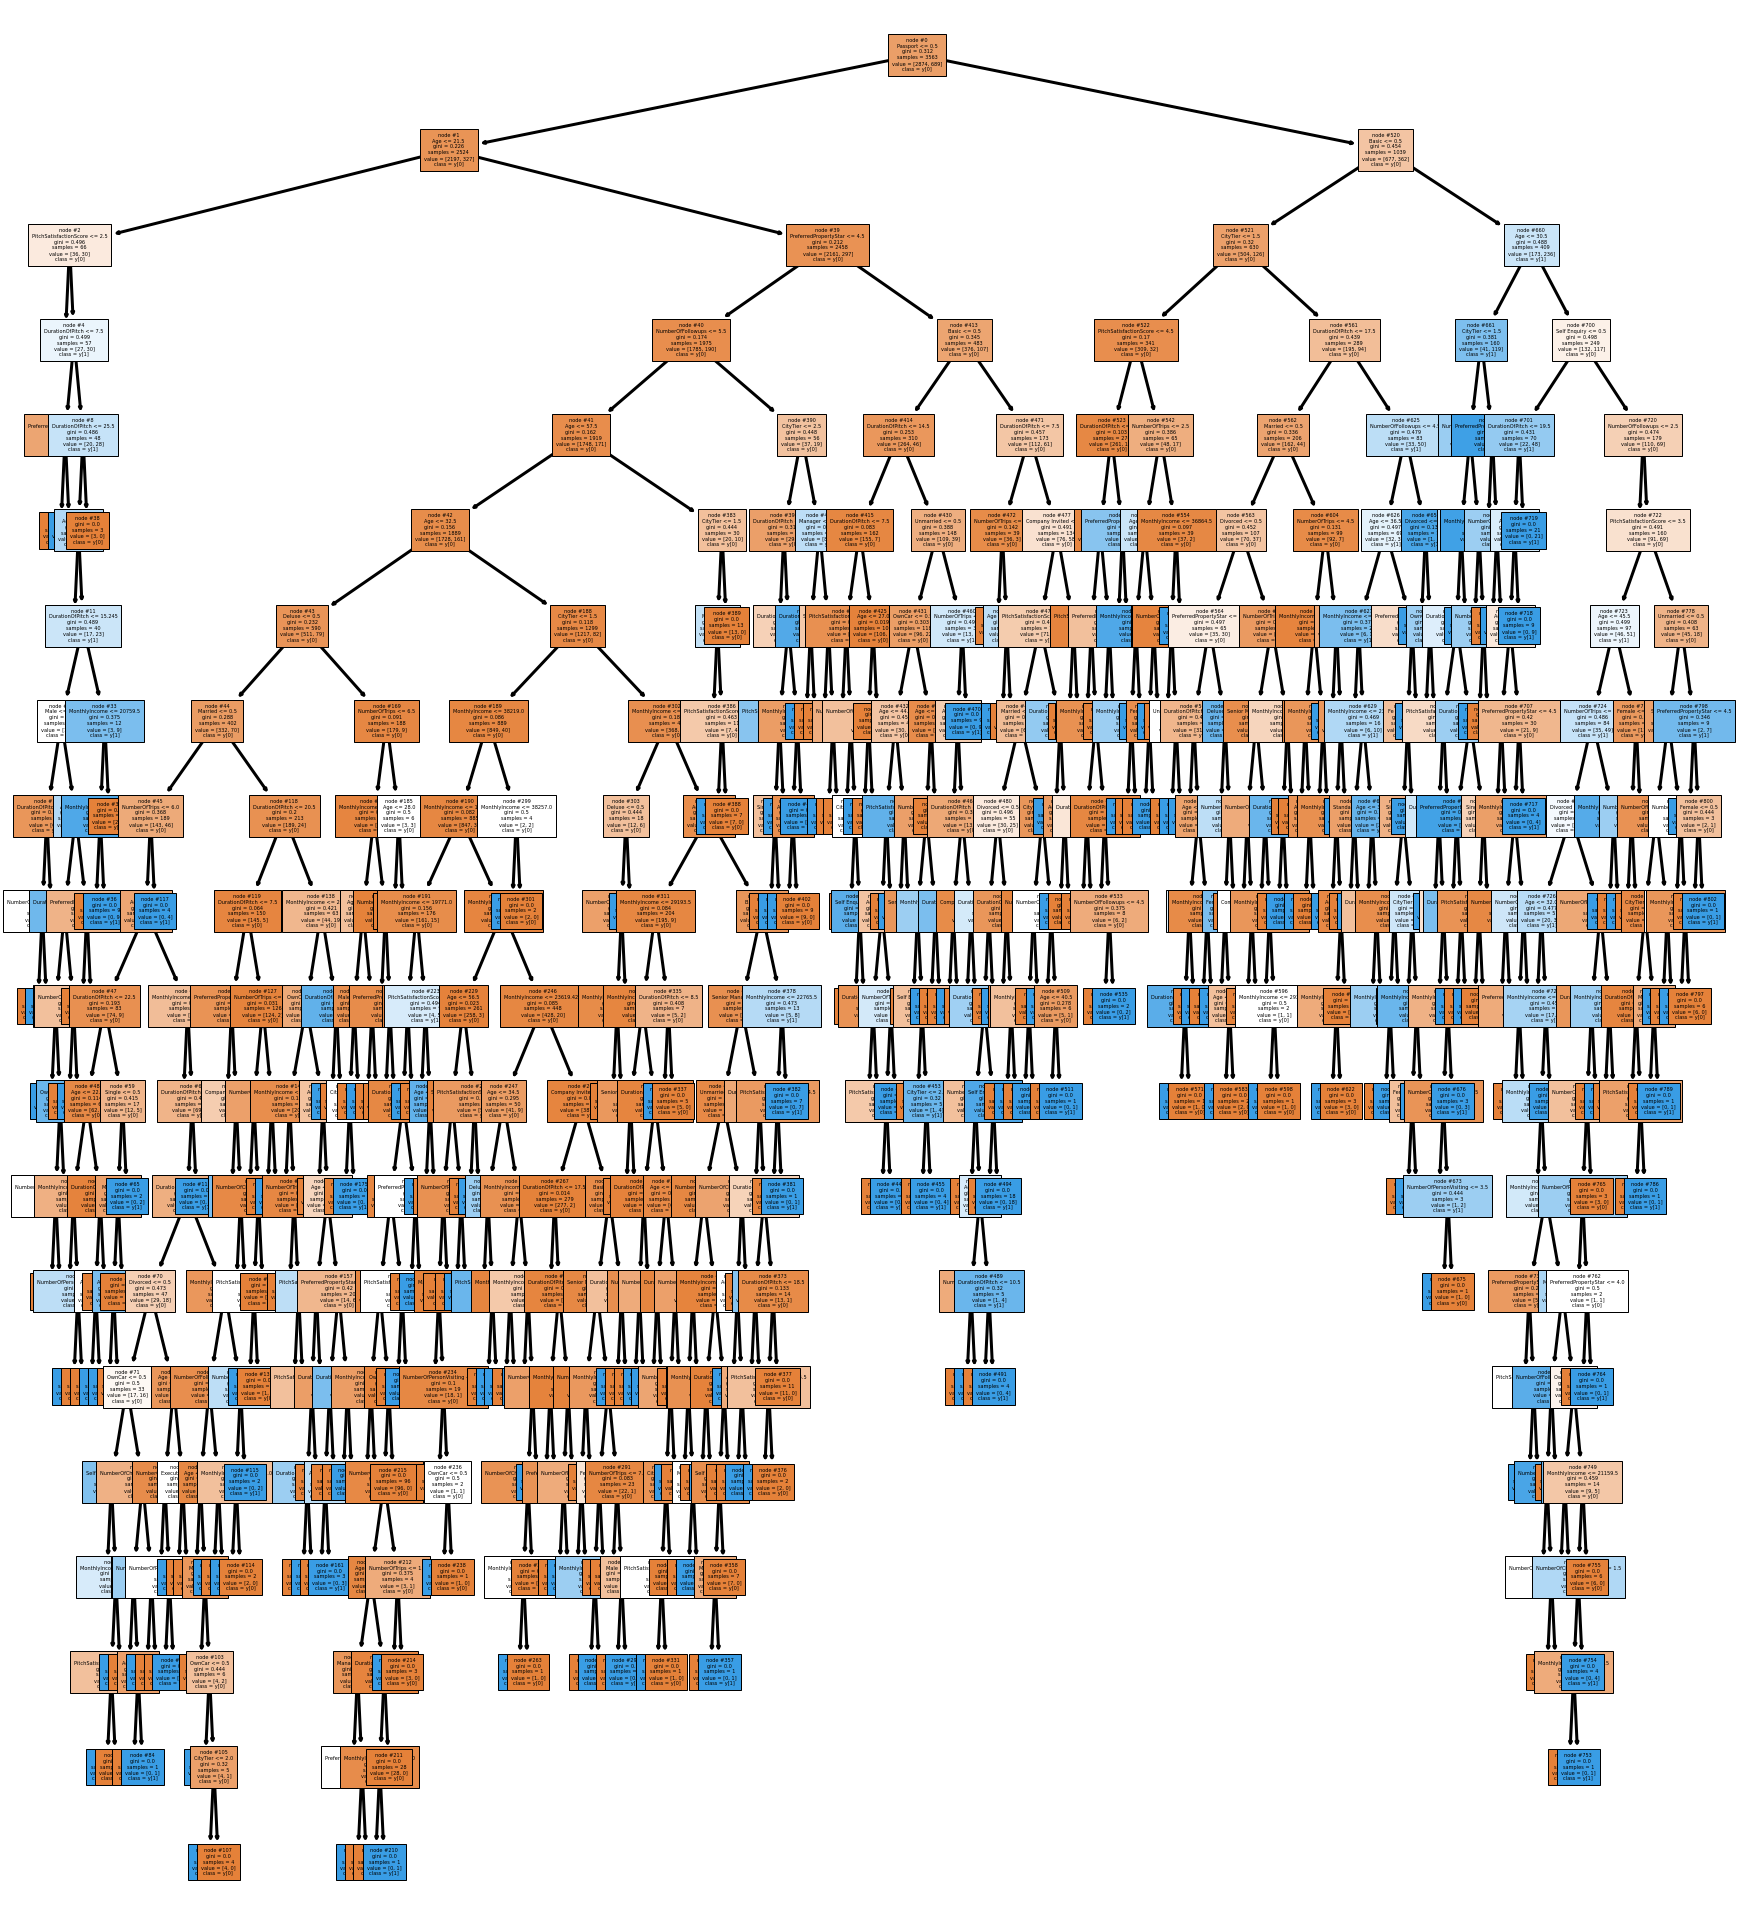

In [40]:
plt.figure(figsize=(30,35))
f = plot_tree(model_dt, feature_names=x.columns, filled=True, fontsize=5, node_ids=True,class_names=True)
for ff in f:
    arrow = ff.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
       

In [41]:
imp = pd.DataFrame(model_dt.feature_importances_, index=x.columns,columns=['Importance'])
imp

,Importance
MonthlyIncome,0.108768
Age,0.145945
CityTier,0.047890
DurationOfPitch,0.143916
NumberOfPersonVisiting,0.011588
NumberOfFollowups,0.045987
PreferredPropertyStar,0.053157
NumberOfTrips,0.062086
Passport,0.063433
PitchSatisfactionScore,0.057275


<AxesSubplot:>

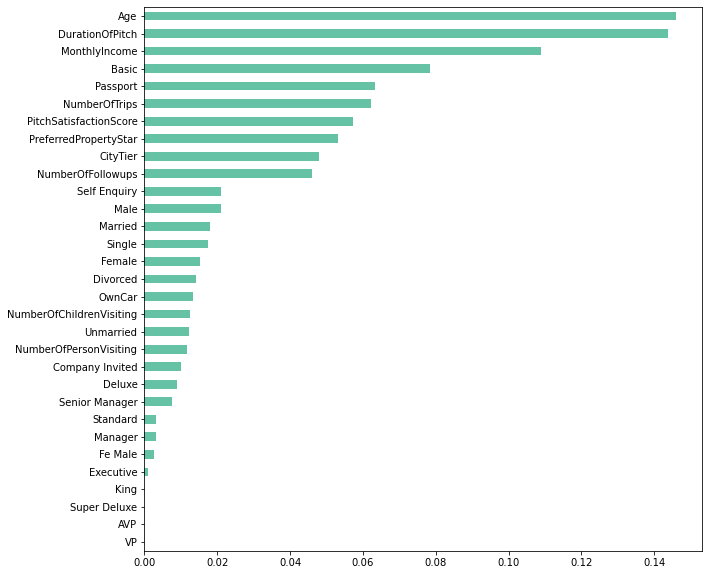

In [45]:
plt.figure(figsize=(10,10))
imp['Importance'].sort_values().plot.barh()
